<a href="https://colab.research.google.com/github/Shakilkhan24/DATA-SCIENCE-AND-ML/blob/main/pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://cdn.wsform.com/wp-content/uploads/2018/09/country_full.csv')
df.head(2)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN


In [ ]:
x=pd.pivot_table(df.head(10),values='country-code',index='alpha-2',columns='name')
x
# that is kind of the syntaxx...but i need to know how can i best use of this pivot_table concepts

name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Åland Islands
alpha-2,,,,,,,,,,
AD,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN
AF,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN
AI,NaN,NaN,NaN,NaN,NaN,NaN,660.0,NaN,NaN,NaN
AL,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AO,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
AQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
AS,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN
AX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0


In [ ]:
# values index columns
# str datetime regex[regular expression]
y=sns.load_dataset('tips')    # lot of datas are stored in sns for learning in a default way___
y.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
ans=pd.pivot_table(y,index='sex',values='tip',columns='smoker',aggfunc='mean')  # different aspect of doing this... just practice
ans

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [ ]:
# male_yes_average_tips?
ans2=pd.pivot_table(y,index='sex',columns='smoker')
ans2

<ipython-input-19-8e5957c1a628>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  ans2=pd.pivot_table(y,index='sex',columns='smoker')


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [ ]:
m_d=pd.pivot_table(y,index=['sex','smoker'],columns=['day','time'],values='total_bill')
m_d
# multidimensional overview of different questions visualized in front of the eye
# we can generate different conditional look up on the datas

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [ ]:
pd.pivot_table(y,index=['sex','smoker'],columns=['day','time'])   # values are size,tip,total_bill

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [ ]:
# very complex analysis ... wonderfull tools to be this
# by looking we can answer many complex conditioned questions we can answer__
pd.pivot_table(y,index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'sum','total_bill':'std'})   # values are size,tip,total_bill

size                                                tip  \
day                Thur              Fri              Sat       Sun   Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner  Lunch   
sex    smoker                                                                
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  30.58   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  58.83   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  20.93   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  58.49   

                                                              total_bill  \
day                    Fri          Sat           Sun               Thur   
time          Dinner Lunch Dinner Lunch  Dinner Lunch  Dinner      Lunch   
sex    smoker                                                              
Male   Yes       0.0  5.70  16.23   0.0   77.74   0.0   52.82   6.757421   
       No        0.0  0.00   5.00   0.0  104.21   0.0  133.96   8.739134   
Female Yes       0.0  7.98  10.80   0.0   43.03   0.0   14.00  10.847137   
       No        3.0  3.00   3.25   0.0   35.42   0.0   46.61   6.904808   

                                                          
day                 Fri                   Sat        Sun  
time              Lunch     Dinner     Dinner     Dinner  
sex    smoker                                             
Male   Yes     2.510963  10.383290   9.988045  10.693824  
       No           NaN   7.092281   9.779061   8.140559  
Female Yes     3.093105   4.810121  10.485703   4.854764  
       No           NaN        NaN   6.730219   8.396159

In [ ]:
# REPRESENTATING IN 2D ,
# BUT ACTUALLY COVERING MULTIDIMENSIONAL VIEW

# POWERFULL TOOLS

In [ ]:
# ONE EXTRA FEATURES ... MARGIN=TRUE
pd.pivot_table(y,index=['sex','smoker'],columns=['day','time'],margins=True) # values are size,tip,total_bill

# give time to analysis...
# we can do every single calculation using groupby but we need lot of process to cover .....

# that's why pivot_table come to take place for doing a wonderfull job

size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                              tip                   ...                      \
day                 All      Thur              Fri  ...       Sat       Sun   
time                        Lunch Dinner     Lunch  ...    Dinner    Dinner   
sex    smoker                                       ...                       
Male   Yes     2.500000  3.058000    NaN  1.900000  ...  2.879259  3.521333   
       No      2.711340  2.941500    NaN       NaN  ...  3.256563  3.115349   
Female Yes     2.242424  2.990000    NaN  2.660000  ...  2.868667  3.500000   
       No      2.592593  2.437083    3.0  3.000000  ...  2.724615  3.329286   
All            2.569672  2.767705    3.0  2.382857  ...  2.993103  3.255132   

                        total_bill                                          \
day                 All       Thur               Fri                   Sat   
time                         Lunch Dinner      Lunch     Dinner     Dinner   
sex    smoker                                                                
Male   Yes     3.051167  19.171000    NaN  11.386667  25.892000  21.837778   
       No      3.113402  18.486500    NaN        NaN  17.475000  19.929063   
Female Yes     2.931515  19.218571    NaN  13.260000  12.200000  20.266667   
       No      2.773519  15.899167  18.78  15.980000  22.750000  19.003846   
All            2.998279  17.664754  18.78  12.845714  19.663333  20.441379   

                                     
day                  Sun        All  
time              Dinner             
sex    smoker                        
Male   Yes     26.141333  22.284500  
       No      20.403256  19.791237  
Female Yes     16.540000  17.977879  
       No      20.824286  18.105185  
All            21.410000  19.785943  

[5 rows x 21 columns]

<Axes: xlabel='sex,smoker'>

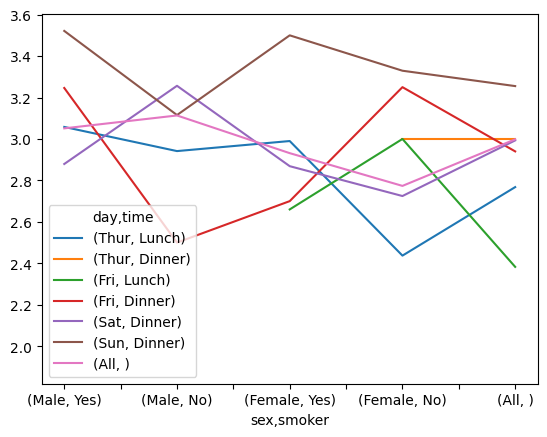

In [ ]:
pd.pivot_table(y,index=['sex','smoker'],columns=['day','time'],values='tip',margins=True).plot()

# graph needs lot of explanations to describe...
# but we can have some beautifull insights from here if i want

# first make p_table, plot and search for your answers on different questions

# part of multi_dimensionality on dataframe representations